# Movie Recommendation System

## Week 1

### Import Library

In [1]:
import string
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_recommenders as tfrs
from collections import Counter
from typing import Dict, Text
from ast import literal_eval
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Read The Dataset

In [2]:
df = pd.read_csv('TMDB_movie_dataset_v11.csv')

In [3]:
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040118,692346,MercyMe: Live,0.000,0,Released,2004-01-01,0,86,False,/21eC71oX5w6N6Sl8QGP6ceXQYMS.jpg,...,MercyMe: Live,Filmed during 'The Imagine Tour' with over 1 h...,0.600,/8pL3OqPDJtNBQ87jadVPlUFpOTs.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1040119,79937,Kausalya Supraja Rama,0.000,0,Released,2008-10-09,0,0,False,NaN,...,Kausalya Supraja Rama,NaN,0.600,/qXoTBtZ8KWL54V10BnGRUSxiX02.jpg,NaN,Drama,NaN,NaN,Telugu,NaN
1040120,692348,Talisman,0.000,0,Released,1991-01-01,0,0,False,/5wg41zygJxt6xBfFKctyciBUHiT.jpg,...,Talisman,NaN,0.654,NaN,NaN,"Comedy, TV Movie",NaN,Czechoslovakia,Czech,based on play or musical
1040121,692349,Mars,0.000,0,Released,1994-08-05,0,60,False,NaN,...,マーズ,Mars is the 1st remake of the franchise and re...,0.600,/b5qwdD83cnVglPvftH1ShwnpFCg.jpg,NaN,"Animation, Action, Science Fiction",NaN,Japan,Japanese,NaN


### Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040123 entries, 0 to 1040122
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1040123 non-null  int64  
 1   title                 1040111 non-null  object 
 2   vote_average          1040123 non-null  float64
 3   vote_count            1040123 non-null  int64  
 4   status                1040123 non-null  object 
 5   release_date          905912 non-null   object 
 6   revenue               1040123 non-null  int64  
 7   runtime               1040123 non-null  int64  
 8   adult                 1040123 non-null  bool   
 9   backdrop_path         288206 non-null   object 
 10  budget                1040123 non-null  int64  
 11  homepage              112396 non-null   object 
 12  imdb_id               580911 non-null   object 
 13  original_language     1040123 non-null  object 
 14  original_title        1040111 non-

(0.0, 2.0, 0.9, 1.2)

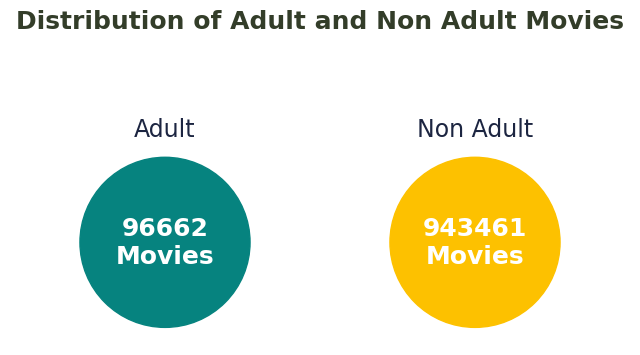

In [5]:
# Distribution of Adult and Non Adult Movies

df['adult'] = df['adult'].astype(str)

plt.figure(figsize=(8,4))
plt.scatter(x=[0.5, 1.5], y=[1,1], s=15000, color=['#06837f', '#fdc100'])
plt.xlim(0,2)
plt.ylim(0.9,1.2)

plt.title('Distribution of Adult and Non Adult Movies', fontsize=18, weight=600, color='#333d29')
plt.text(0.5, 1, '{}\nMovies'.format(str(len(df[df['adult']=='True']))), va='center', ha='center', fontsize=18, weight=600, color='white')
plt.text(1.5, 1, '{}\nMovies'.format(str(len(df[df['adult']=='False']))), va='center', ha='center', fontsize=18, weight=600, color='white')
plt.text(0.5, 1.11, 'Adult', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')
plt.text(1.5, 1.11, 'Non Adult', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')

plt.axis('off')

C:\Users\NIAR\AppData\Local\Temp\ipykernel_22000\3984433770.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_all_genres, x='genre', y='total', palette='viridis')
C:\Users\NIAR\AppData\Local\Temp\ipykernel_22000\3984433770.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


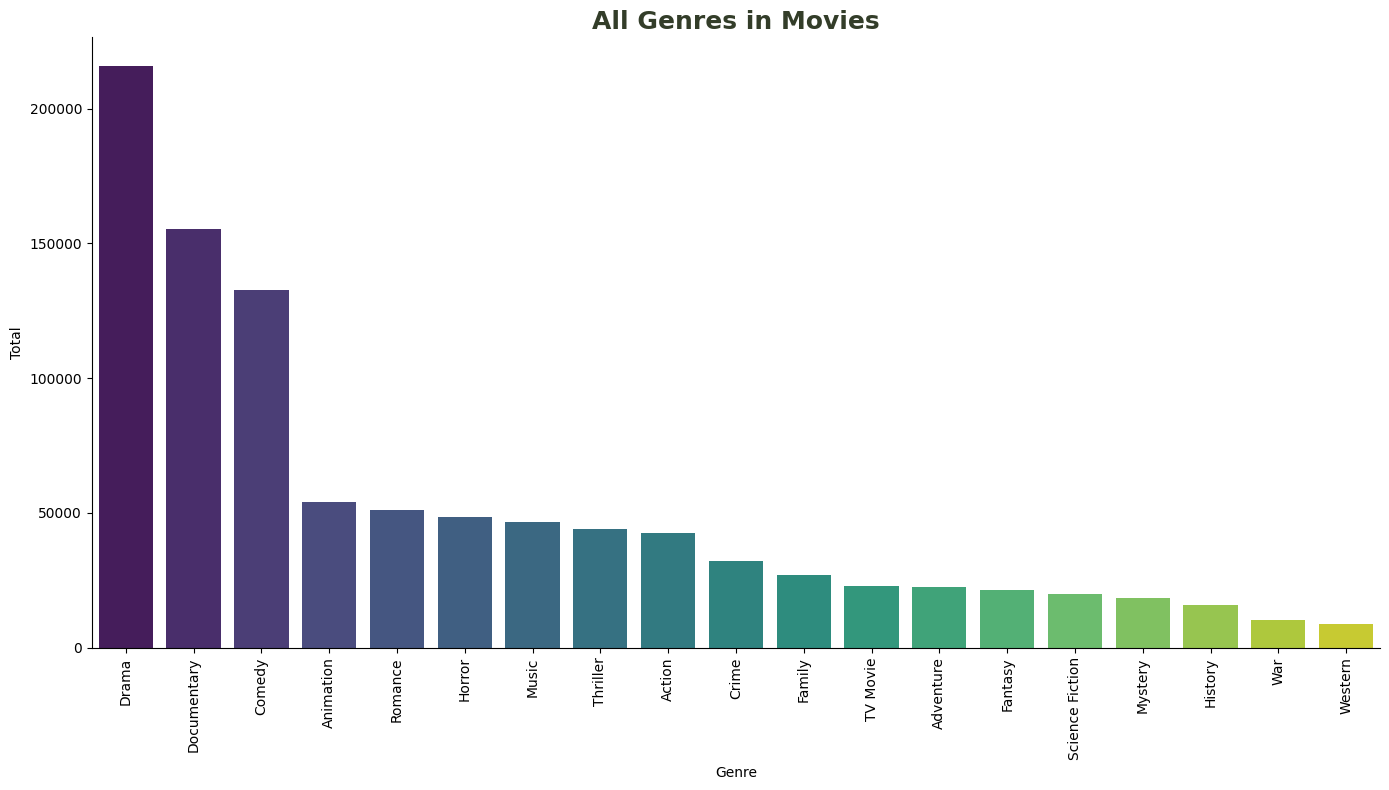

In [6]:
# Distribution of All Genres
df_genres = df['genres'].dropna()

# Creating a list of genres
genres_list = []
for i in df_genres:
    if isinstance(i, str):
        genres_list.extend(i.split(', '))

# Creating DataFrames for the all genres
df_all_genres = pd.DataFrame(Counter(genres_list).most_common(), columns=['genre', 'total'])

# Setting the plot size
plt.figure(figsize=(14, 8))

# Creating bar charts for all genres
ax = sns.barplot(data=df_all_genres, x='genre', y='total', palette='viridis')
ax.set_title('All Genres in Movies', fontsize=18, weight=600, color='#333d29')
ax.set_xlabel('Genre')
ax.set_ylabel('Total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.despine()

# Displaying the plot
plt.tight_layout()
plt.show()

C:\Users\NIAR\AppData\Local\Temp\ipykernel_22000\3481469708.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])


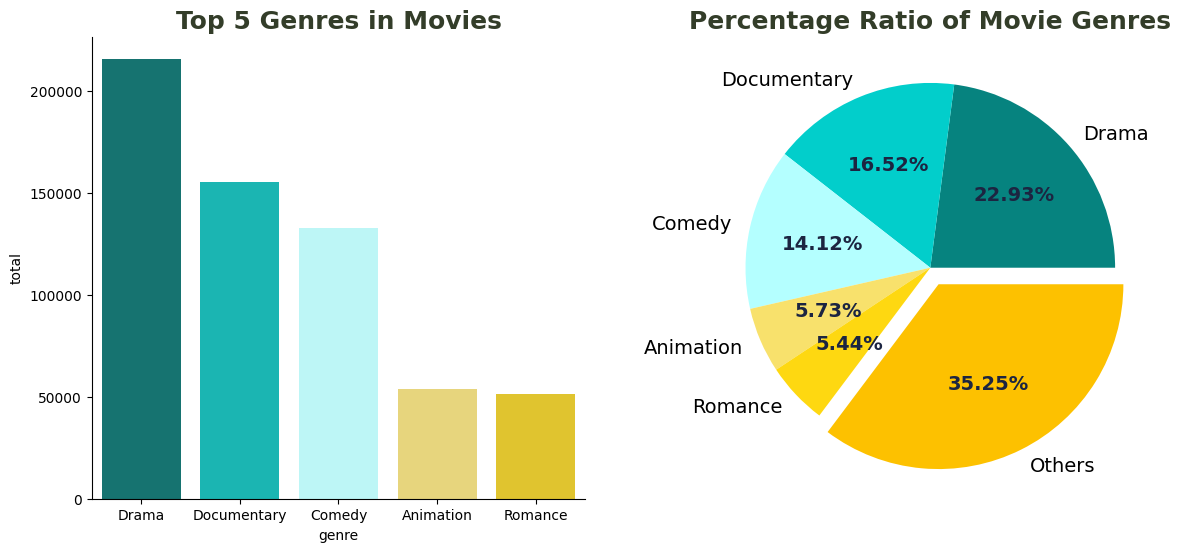

In [7]:
# Distribution of Top 5 Genres
df_genres = df['genres'].dropna()

# Creating a list of genres
genres_list = []
for i in df_genres:
    if isinstance(i, str):
        genres_list.extend(i.split(', '))

# Set the plot size and number of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# Creating DataFrames for the top 5 genres
df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()

# Create a DataFrame for the entire genre
df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'genre': 'Others', 'total': df_plot_full[6:].sum()[0]}

# Creating a pie chart
wedges, texts, autotexts = axes[1].pie(
    x=df_plot['total'], 
    labels=df_plot['genre'], 
    autopct='%.2f%%',
    textprops=dict(fontsize=14), 
    explode=[0, 0, 0, 0, 0, 0.1], 
    colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100']
)
axes[1].set_title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')

# Modify the color and weight of the text on the pie chart
for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

# Remove axes on pie charts
axes[1].axis('off')

# Displaying the plot
plt.show()

C:\Users\NIAR\AppData\Local\Temp\ipykernel_22000\292807256.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_plot, x='genres', y=y, ax=axes.flatten()[i], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
C:\Users\NIAR\AppData\Local\Temp\ipykernel_22000\292807256.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_plot, x='genres', y=y, ax=axes.flatten()[i], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
C:\Users\NIAR\AppData\Local\Temp\ipykernel_22000\292807256.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

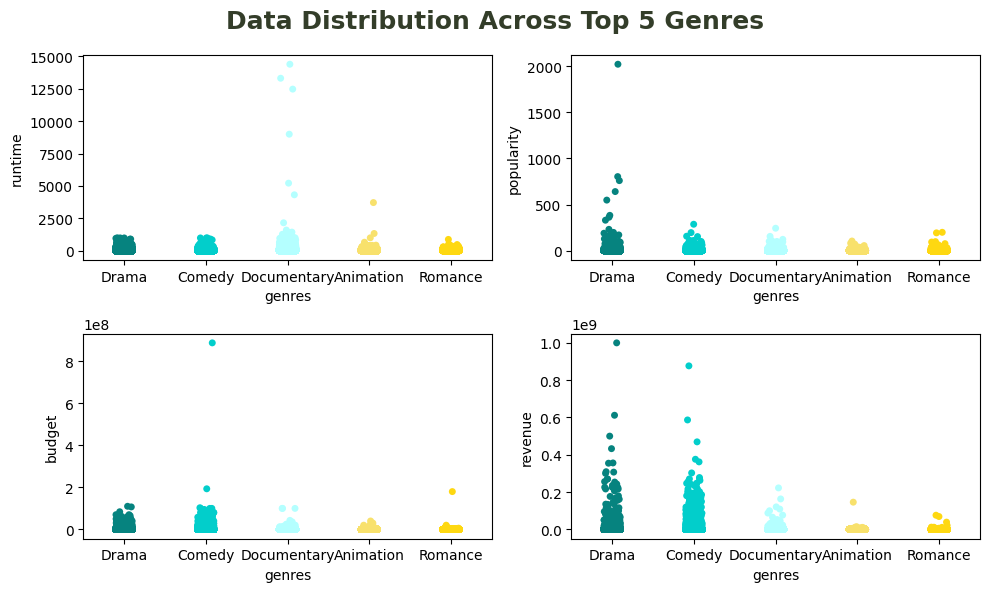

In [8]:
# Distribution Across Top 5 Genres
df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
df_plot = df[df['genres'].isin(df_plot['genre'].to_numpy())]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

plt.suptitle('Data Distribution Across Top 5 Genres', fontsize=18, weight=600, color='#333d29')
for i, y in enumerate(['runtime', 'popularity', 'budget', 'revenue']):
    sns.stripplot(data=df_plot, x='genres', y=y, ax=axes.flatten()[i], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])

plt.tight_layout()

### Cleaning The Dataset

In [9]:
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040118,692346,MercyMe: Live,0.000,0,Released,2004-01-01,0,86,False,/21eC71oX5w6N6Sl8QGP6ceXQYMS.jpg,...,MercyMe: Live,Filmed during 'The Imagine Tour' with over 1 h...,0.600,/8pL3OqPDJtNBQ87jadVPlUFpOTs.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1040119,79937,Kausalya Supraja Rama,0.000,0,Released,2008-10-09,0,0,False,NaN,...,Kausalya Supraja Rama,NaN,0.600,/qXoTBtZ8KWL54V10BnGRUSxiX02.jpg,NaN,Drama,NaN,NaN,Telugu,NaN
1040120,692348,Talisman,0.000,0,Released,1991-01-01,0,0,False,/5wg41zygJxt6xBfFKctyciBUHiT.jpg,...,Talisman,NaN,0.654,NaN,NaN,"Comedy, TV Movie",NaN,Czechoslovakia,Czech,based on play or musical
1040121,692349,Mars,0.000,0,Released,1994-08-05,0,60,False,NaN,...,マーズ,Mars is the 1st remake of the franchise and re...,0.600,/b5qwdD83cnVglPvftH1ShwnpFCg.jpg,NaN,"Animation, Action, Science Fiction",NaN,Japan,Japanese,NaN


In [10]:
# Remove duplicates from DataFrame
df.drop_duplicates(keep='first', inplace=True)

In [11]:
# Check the number of missing values (NaN) in each column in the DataFrame
df.isna().sum()

id                           0
title                       12
vote_average                 0
vote_count                   0
status                       0
release_date            133999
revenue                      0
runtime                      0
adult                        0
backdrop_path           751590
budget                       0
homepage                927406
imdb_id                 458960
original_language            0
original_title              12
overview                192317
popularity                   0
poster_path             299703
tagline                 891262
genres                  392773
production_companies    552576
production_countries    433602
spoken_languages        420512
keywords                744251
dtype: int64

In [12]:
# Delete the NaN value in the Title column
df.dropna(subset=['title'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1039754 entries, 0 to 1040122
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1039754 non-null  int64  
 1   title                 1039754 non-null  object 
 2   vote_average          1039754 non-null  float64
 3   vote_count            1039754 non-null  int64  
 4   status                1039754 non-null  object 
 5   release_date          905763 non-null   object 
 6   revenue               1039754 non-null  int64  
 7   runtime               1039754 non-null  int64  
 8   adult                 1039754 non-null  object 
 9   backdrop_path         288173 non-null   object 
 10  budget                1039754 non-null  int64  
 11  homepage              112360 non-null   object 
 12  imdb_id               580806 non-null   object 
 13  original_language     1039754 non-null  object 
 14  original_title        1039754 non-null 

In [14]:
# Changing release date to datetime type
df['release_date'] = pd.to_datetime(df['release_date'])

### Content-Based Recommender

In [15]:
R = df['vote_average']
v = df['vote_count']
# We will only consider movies that have more votes than at least 80% of the movies in our dataset
m = df['vote_count'].quantile(0.8)
C = df['vote_average'].mean()

df['weighted_average'] = (R*v + C*m)/(v+m)

In [16]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['popularity', 'weighted_average']])
weighted_df = pd.DataFrame(scaled, columns=['popularity', 'weighted_average'])

weighted_df.index = df['original_title']

In [17]:
weighted_df['score'] = weighted_df['weighted_average']*0.4 + weighted_df['popularity'].astype('float64')*0.6

In [18]:
weighted_df_sorted = weighted_df.sort_values(by='score', ascending=False)
weighted_df_sorted.head(10)

,popularity,weighted_average,score
original_title,,,
Blue Beetle,1.000000,0.712737,0.885095
Gran Turismo,0.895215,0.816772,0.863838
巨乳上司と童貞部下が出張先の相部屋ホテルで…いたずら誘惑を真に受けた部下が10発射精の絶倫性交 三上悠亜,0.674698,0.849019,0.744426
The Nun II,0.565323,0.644050,0.596814
Meg 2: The Trench,0.523409,0.687702,0.589126
Talk to Me,0.487088,0.721127,0.580703
Retribution,0.516712,0.673257,0.579330
Sound of Freedom,0.371043,0.805330,0.544758
Fast X,0.392494,0.727778,0.526607


In [19]:
content_df = df[['original_title', 'adult', 'genres', 'overview', 'production_companies', 'tagline', 'keywords']]

In [20]:
def separate(text):
    clean_text = []
    for t in text.split(','):
        cleaned = re.sub('\(.*\)', '', t) # Remove text inside parentheses
        cleaned = cleaned.translate(str.maketrans('','', string.digits))
        cleaned = cleaned.replace(' ', '')
        cleaned = cleaned.translate(str.maketrans('','', string.punctuation)).lower()
        clean_text.append(cleaned)
    return ' '.join(clean_text)

def remove_punc(text):
    cleaned = text.translate(str.maketrans('','', string.punctuation)).lower()
    clean_text = cleaned.translate(str.maketrans('','', string.digits))
    return clean_text

In [21]:
def remove_punc(text):
    if pd.notna(text):
        return text.translate(str.maketrans('', '', string.punctuation))
    return ''

def separate(text):
    if pd.notna(text):
        return ' '.join(text.split(', '))
    return ''

# Terapkan fungsi ke kolom yang sesuai
content_df['adult'] = content_df['adult'].apply(remove_punc)
content_df['genres'] = content_df['genres'].apply(remove_punc)
content_df['overview'] = content_df['overview'].apply(remove_punc)
content_df['production_companies'] = content_df['production_companies'].apply(separate)
content_df['tagline'] = content_df['tagline'].apply(remove_punc)
content_df['keywords'] = content_df['keywords'].apply(separate)

# Membuat kolom 'bag_of_words'
content_df['bag_of_words'] = content_df[content_df.columns[1:]].apply(lambda x: ' '.join(x.dropna()), axis=1)
content_df.set_index('original_title', inplace=True)

# Memilih hanya kolom 'bag_of_words'
content_df = content_df[['bag_of_words']]
print(content_df.head())

C:\Users\NIAR\AppData\Local\Temp\ipykernel_22000\2983499158.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_df['adult'] = content_df['adult'].apply(remove_punc)
C:\Users\NIAR\AppData\Local\Temp\ipykernel_22000\2983499158.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_df['genres'] = content_df['genres'].apply(remove_punc)
C:\Users\NIAR\AppData\Local\Temp\ipykernel_22000\2983499158.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

                                                      bag_of_words
original_title                                                    
Inception        False Action Science Fiction Adventure Cobb a ...
Interstellar     False Adventure Drama Science Fiction The adve...
The Dark Knight  False Drama Action Crime Thriller Batman raise...
Avatar           False Action Adventure Fantasy Science Fiction...
The Avengers     False Science Fiction Action Adventure When an...


C:\Users\NIAR\AppData\Local\Temp\ipykernel_22000\2983499158.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_df['bag_of_words'] = content_df[content_df.columns[1:]].apply(lambda x: ' '.join(x.dropna()), axis=1)


In [22]:
content_df = weighted_df_sorted[:10000].merge(content_df, left_index=True, right_index=True, how='left')

tfidf = TfidfVectorizer(stop_words='english', min_df=5)
tfidf_matrix = tfidf.fit_transform(content_df['bag_of_words'])
tfidf_matrix.shape

(18893, 13999)

In [23]:
cos_sim = cosine_similarity(tfidf_matrix)
cos_sim.shape

(18893, 18893)

In [24]:
content_df

,popularity,weighted_average,score,bag_of_words
original_title,,,,
#Female Pleasure,0.000502,0.715637,0.286556,False Documentary A plea for the liberation of...
#살아있다,0.008055,0.729359,0.296577,False Horror Action Adventure Thriller As a gr...
'Donnie Darko': Production Diary,0.000884,0.723683,0.290004,False Documentary Behind the scenes look at th...
'The Godfather' Family: A Look Inside,0.001754,0.742611,0.298097,False Documentary A documentary on the making ...
(500) Days of Summer,0.011125,0.728745,0.298173,False Comedy Drama Romance Tom greetingcard wr...
...,...,...,...,...
"힘을 내요, 미스터 리",0.001439,0.767331,0.307796,False Drama Comedy Chulsoo is a man with an in...
１リットルの涙,0.000832,0.733076,0.293730,False Drama 15yearold Aya Kito was an ordinary...
Ｗの悲劇,0.001158,0.708279,0.284006,False Drama A young girl is striving for stard...


In [25]:
def predict(title, similarity_weight=0.7, top_n=10):
    data = content_df.reset_index()
    index_movie = data[data['original_title'] == title].index
    similarity = cos_sim[index_movie].T
    
    sim_df = pd.DataFrame(similarity, columns=['similarity'])
    final_df = pd.concat([data, sim_df], axis=1)
    # You can also play around with the number
    final_df['final_score'] = final_df['score']*(1-similarity_weight) + final_df['similarity']*similarity_weight
    
    final_df_sorted = final_df.sort_values(by='final_score', ascending=False).head(top_n)
    final_df_sorted.set_index('original_title', inplace=True)
    return final_df_sorted[['score', 'similarity', 'final_score']]

In [27]:
predict('Toy Story', similarity_weight=0.7, top_n=20)

,score,similarity,final_score
original_title,,,
Toy Story,0.338783,1.000000,0.801635
Toy Story 2,0.320551,0.430402,0.397446
Toy Story 4,0.314027,0.410977,0.381892
Toy Story 3,0.328840,0.346177,0.340976
Ace in the Hole,0.320361,0.322533,0.321881
Beyond Infinity: Buzz and the Journey to Lightyear,0.284298,0.315507,0.306144
Blue Beetle,0.885095,0.012225,0.274086
Lamp Life,0.288551,0.262671,0.270435
Gran Turismo,0.863838,0.007221,0.264206


### TensorFlow Recommendation System

In [28]:
ratings_df = pd.read_csv('ratings.csv')

In [29]:
ratings_df

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [30]:
ratings_df['date'] = ratings_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
ratings_df.drop('timestamp', axis=1, inplace=True)

ratings_df = ratings_df.merge(df[['id', 'original_title', 'genres', 'overview','popularity']], left_on='movieId',right_on='id', how='left')
ratings_df = ratings_df[~ratings_df['id'].isna()]
ratings_df.drop('id', axis=1, inplace=True)
ratings_df.reset_index(drop=True, inplace=True)

ratings_df.head()

,userId,movieId,rating,date,original_title,genres,overview,popularity
0,1,110,1.0,2015-03-10 05:52:09,Trois couleurs : Rouge,"Drama, Mystery, Romance","Valentine, a student model in Geneva, struggle...",20.455
1,1,147,4.5,2015-03-10 06:07:15,Les Quatre Cents Coups,Drama,"For young Parisian boy Antoine Doinel, life is...",14.392
2,1,858,5.0,2015-03-10 05:52:03,Sleepless in Seattle,"Comedy, Drama, Romance","When Sam Baldwin's wife dies, he is left to br...",21.246
3,1,1246,5.0,2015-03-10 05:52:36,Rocky Balboa,Drama,"His Wife is dead and his Son hates him, but th...",35.605
4,1,1968,4.0,2015-03-10 06:02:28,Fools Rush In,"Comedy, Drama, Romance","After a one night stand with Alex, Isabel real...",19.425


In [31]:
movies_df = df[['id', 'original_title']]
movies_df.rename(columns={'id':'movieId'}, inplace=True)
movies_df.head()

C:\Users\NIAR\AppData\Local\Temp\ipykernel_22000\1980486665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.rename(columns={'id':'movieId'}, inplace=True)


,movieId,original_title
0,27205,Inception
1,157336,Interstellar
2,155,The Dark Knight
3,19995,Avatar
4,24428,The Avengers


In [32]:
ratings_df['userId'] = ratings_df['userId'].astype(str)

ratings = tf.data.Dataset.from_tensor_slices(dict(ratings_df[['userId', 'original_title', 'rating']]))
movies = tf.data.Dataset.from_tensor_slices(dict(movies_df[['original_title']]))

ratings = ratings.map(lambda x: {
    "original_title": x["original_title"],
    "userId": x["userId"],
    "rating": float(x["rating"])
})

movies = movies.map(lambda x: x["original_title"])

In [33]:
print('Total Data: {}'.format(len(ratings)))

tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = ratings.take(35_000)
test = ratings.skip(35_000).take(8_188)

Total Data: 15815717


In [34]:
movie_titles = movies.batch(1_000)
user_ids = ratings.batch(1_000).map(lambda x: x["userId"])

unique_movie_titles = np.unique(np.concatenate(list(movie_titles)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

print('Unique Movies: {}'.format(len(unique_movie_titles)))
print('Unique users: {}'.format(len(unique_user_ids)))

Unique Movies: 927567
Unique users: 268181


In [38]:
class MovieModel(tfrs.models.Model):

  def __init__(self, rating_weight: float, retrieval_weight: float) -> None:

    super().__init__()

    embedding_dimension = 128  # Meningkatkan dimensi embedding

    # User and movie models.
    self.movie_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_movie_titles, mask_token=None),
      tf.keras.layers.Embedding(len(unique_movie_titles) + 1, embedding_dimension)
    ])
    self.user_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_ids, mask_token=None),
      tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
    ])

    # A small model to take in user and movie embeddings and predict ratings.
    self.rating_model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),  # Menambahkan dropout
        tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1),
    ])

    # The tasks.
    self.rating_task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()],
    )
    self.retrieval_task: tf.keras.layers.Layer = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=movies.batch(128).map(self.movie_model)
        )
    )

    # The loss weights.
    self.rating_weight = rating_weight
    self.retrieval_weight = retrieval_weight

  def call(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:
    user_embeddings = self.user_model(features["userId"])
    movie_embeddings = self.movie_model(features["original_title"])
    
    return (
        user_embeddings,
        movie_embeddings,
        self.rating_model(
            tf.concat([user_embeddings, movie_embeddings], axis=1)
        ),
    )

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:

    ratings = features.pop("rating")

    user_embeddings, movie_embeddings, rating_predictions = self(features)

    # compute the loss for each task.
    rating_loss = self.rating_task(
        labels=ratings,
        predictions=rating_predictions,
    )
    retrieval_loss = self.retrieval_task(user_embeddings, movie_embeddings)

    # combine them using the loss weights.
    return (self.rating_weight * rating_loss
            + self.retrieval_weight * retrieval_loss)

In [ ]:
model = MovieModel(rating_weight=1.0, retrieval_weight=1.0)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))  # Mengubah optimizer dan learning rate

cached_train = train.shuffle(100_000).batch(1_000).cache()
cached_test = test.batch(1_000).cache()

model.fit(cached_train, epochs=10)  # Meningkatkan jumlah epoch

Epoch 1/10
26/35 [=====================>........] - ETA: 1:19 - root_mean_squared_error: 2.3725 - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 3.8462e-05 - factorized_top_k/top_10_categorical_accuracy: 7.6923e-05 - factorized_top_k/top_50_categorical_accuracy: 1.1538e-04 - factorized_top_k/top_100_categorical_accuracy: 1.5385e-04 - loss: 6913.6435 - regularization_loss: 6.8663 - total_loss: 6920.5098

In [ ]:
metrics = model.evaluate(cached_test, return_dict=True)

print(f"\nRetrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}")